**ANALYSIS**

1. Tumor volume is steadily reduced with only Capomulin (-20% in 45 days). Other drugs don't show any positive impact, comparing to Placebo. Standard error values show that there is no large variability in mice population and individual tumor response to each drug is mostly common among all mice.
2. The metastatic spread is significantly lower among mice that were treated with Capomulin. SEMs show the Capomulin population consistency. Other drugs have smaller effect on the spread, and higher variability in mice population responce.
3. Capomulin is the only drug with a strong positive effect on a survival rate, which is 84%, comparing to 44% and 36% after treatment with other drugs. Other drugs have the same survival rate as Placebo, that means that they don't bring any impact.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import cycle

In [2]:
trial_data = pd.read_csv('Resources/clinicaltrial_data.csv', low_memory=False)
mouse_data = pd.read_csv('Resources/mouse_drug_data.csv', low_memory=False)

In [3]:
# g989 Stelasyn and Propriva

In [4]:
# Add Drug column to trial_data
mousedrug = {}
counter = 0
for i in mouse_data['Mouse ID']:
    mousedrug[i] = mouse_data['Drug'][counter]
    counter += 1

drug = [mousedrug[i] for i in trial_data['Mouse ID'] if i in mousedrug]
    
#for i in trial_data['Mouse ID']:
    #if i in mousedrug:
        #drug.append(mousedrug[i])

trial_data = trial_data.assign(Drug= drug)

In [5]:
# Group trial_data by Drug and Time
drug_time_group = trial_data.groupby(['Drug', 'Timepoint'])

In [6]:
# Find means of the tumor volume changes 
tumor_time_metast_mean = drug_time_group.mean()
ttmm = tumor_time_metast_mean.reset_index()
tumor_time_m = ttmm.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tt_mean = tumor_time_m.reset_index()
tt_mean.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.470830,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.335368,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.448025,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,53.970080,53.170334


In [7]:
# Find standart errors 
tumor_time_metast_sem = drug_time_group.sem()
ttms = tumor_time_metast_sem.reset_index()
tumor_time_sem = ttms.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tt_err = tumor_time_sem.reset_index()
tt_err.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.254830,0.188950
2,10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.461474,0.263949
3,15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.532904,0.370544
4,20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.684670,0.533182


In [8]:
# Make basis for plots
# Colors can be changed, as well as any other drugs can be added or excluded from a list, if someone wants to.
colorcycle = cycle(['r', 'g', 'b', 'orange'])
markercycle = cycle(['d', '3', 'P', 'v', '8', 'h'])
drug_list = ['Capomulin', 'Infubinol', 'Ketapril','Placebo']

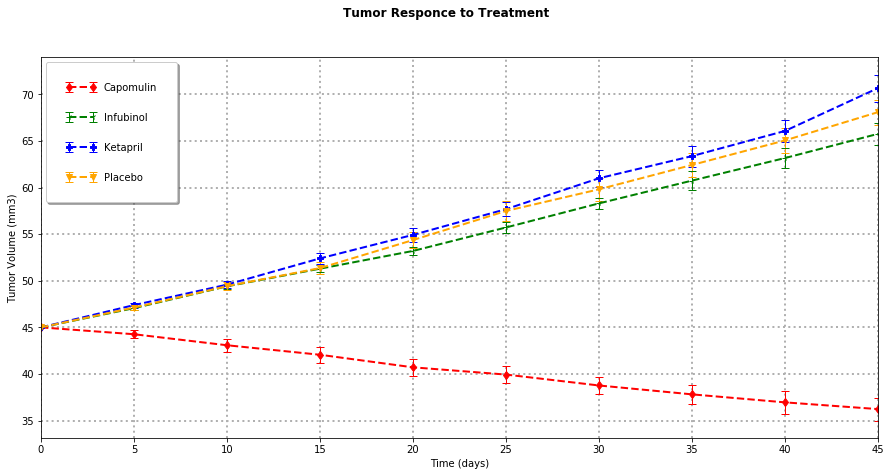

In [9]:
# Create subplots
fig, ax = plt.subplots()
fig.suptitle('Tumor Responce to Treatment', fontsize=12, fontweight="bold")
fig.set_size_inches(15,7)
plt.rcParams['legend.numpoints'] = 2 # Set 2 markers in legend
ax.set_xlim(tt_mean['Timepoint'][0], tt_mean['Timepoint'].max(), 1)

for drug in tt_mean.columns:
    if drug in drug_list:
        ax.errorbar(tt_mean['Timepoint'], tt_mean[drug], tt_err[drug], c = next(colorcycle),
                         fmt=next(markercycle), linestyle='dashed', label=drug, linewidth=2, capsize=4, elinewidth=1)
    
ax.set_xlabel('Time (days)')
ax.set_ylabel('Tumor Volume (mm3)')
ax.grid(linestyle='dotted', linewidth=2)
ax.legend(loc='best', fancybox=True, shadow=True, borderpad=2, labelspacing=2, handlelength=3)

In [10]:
# Find means of metastatic sites changes over the time
mtm = tumor_time_metast_mean.reset_index()
metast_time_m = mtm.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
mt_mean = metast_time_m.reset_index()

In [11]:
# Find standart errors of metastatic sites changes over the time
mtms = tumor_time_metast_sem.reset_index()
metast_time_sem = mtms.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
mt_err = metast_time_sem.reset_index()

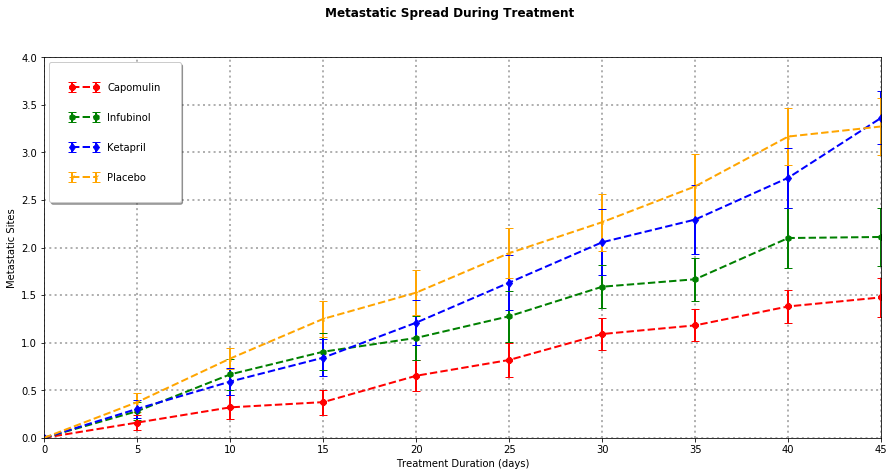

In [12]:
# Create a plot
fig, ax = plt.subplots()
fig.suptitle('Metastatic Spread During Treatment', fontsize=12, fontweight="bold")
fig.set_size_inches(15,7)
plt.rcParams['legend.numpoints'] = 2
ax.set_xlim(mt_mean['Timepoint'][0], mt_mean['Timepoint'].max(), 1)
ax.set_ylim(0, 4, 0.5)

for drug in mt_mean.columns:
    if drug in drug_list:
        ax.errorbar(mt_mean['Timepoint'], mt_mean[drug], mt_err[drug], c = next(colorcycle),
                        linestyle='dashed', fmt=next(markercycle), label=drug, linewidth=2, capsize=4, elinewidth=2)
    
ax.set_xlabel('Treatment Duration (days)')
ax.set_ylabel('Metastatic Sites')
ax.grid(linestyle='dotted', linewidth=2)
ax.legend(loc='best', fancybox=True, shadow=True, borderpad=2, labelspacing=2, handlelength=3)

In [13]:
# Create a DF with number of mice
micecount = drug_time_group.count()
mc = micecount.reset_index()
s_rate = mc.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
surv_rate = s_rate.reset_index()

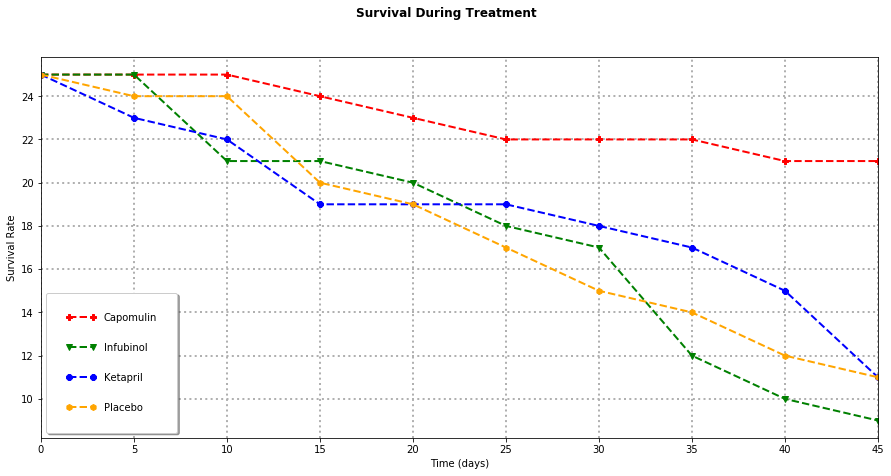

In [14]:
# Create a plot
fig, ax = plt.subplots()
fig.suptitle('Survival During Treatment', fontsize=12, fontweight="bold")
fig.set_size_inches(15,7)
plt.rcParams['legend.numpoints'] = 2
ax.set_xlim(surv_rate['Timepoint'][0], surv_rate['Timepoint'].max(), 1)

for drug in surv_rate.columns:
    if drug in drug_list:
        ax.plot(surv_rate['Timepoint'], surv_rate[drug], c = next(colorcycle),
                        linestyle='dashed', marker=next(markercycle), label=drug, linewidth=2)
    
ax.set_xlabel('Time (days)')
ax.set_ylabel('Survival Rate')
ax.grid(linestyle='dotted', linewidth=2)
ax.legend(loc='best', fancybox=True, shadow=True, borderpad=2, labelspacing=2, handlelength=3)

**Create Bar Chart**

In [15]:
# Create a DF with only necessary drugs and tumor sizes
for drug in drug_list:
    dfdrugs = tt_mean.loc[:,drug_list]
# Calculate a tumor change %
first = dfdrugs.iloc[0,:]
last = dfdrugs.iloc[-1,:]
diff = last*100/first
perc = diff - 100
# Create a Df Drug: Tumor change
drug_perc = pd.DataFrame(perc)
drug_perc_df = drug_perc.reset_index()
drug_perc_df.columns = ['Drug', '% Tumor Volume Change']
# Split in 2 Dfs above and below 0
dpbelow = drug_perc_df[drug_perc_df['% Tumor Volume Change'] <= 0]
dpabove = drug_perc_df[drug_perc_df['% Tumor Volume Change'] > 0]

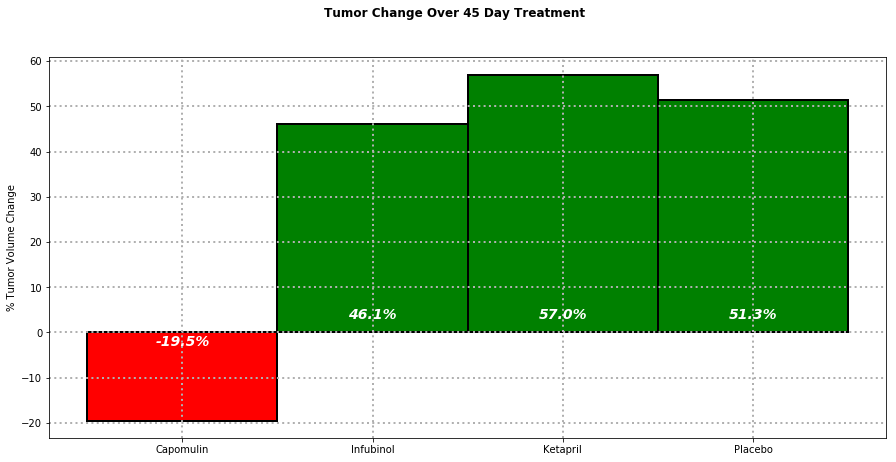

In [16]:
# Create a plot
fig, ax = plt.subplots()
fig.suptitle('Tumor Change Over 45 Day Treatment', fontsize=12, fontweight="bold")
fig.set_size_inches(15,7)
ax.set_ylabel('% Tumor Volume Change')

ax.bar(dpbelow['Drug'], dpbelow['% Tumor Volume Change'], edgecolor='black', color='r', linewidth=2, width=1,
        label = dpbelow['% Tumor Volume Change'])
ax.bar(dpabove['Drug'], dpabove['% Tumor Volume Change'], edgecolor='black', color='g', linewidth=2, width=1,
        label = dpabove['% Tumor Volume Change'])

rects = ax.patches
for rect in rects:
    height = rect.get_height()
    x_value = rect.get_x() + rect.get_width()/2
    label = "{:.1f}%".format(height)
    if height > 0:
        y_value = 3 # Don't like it, shall change later
    else:    
        y_value = -3
        
    ax.text(x_value, y_value,label, horizontalalignment='center', color='w', fontweight='bold',
           fontsize=14, fontstyle='italic')

ax.grid(linestyle='dotted', linewidth=2)